# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,234 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [2]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 14.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=7a09e3b77a21eee039bce281e20ef3c470f0cc7c2baea680a7f65a1637759fb6
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [3]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-4. 구글드라이브 연결(Colab)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [5]:
data_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/train.csv'
data = pd.read_csv(data_path)

In [6]:
data.shape

(3706, 2)

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [7]:
data.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [10]:
data.describe()

,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [11]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

df = data.replace(label_dict)
df.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


### 5-2. Train Validation split

In [25]:
from sklearn.model_selection import train_test_split
x = df['text']
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2964,), (742,), (2964,), (742,))

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [26]:
import re

test_str = "AA**BB#@$CC 가나다-123"

new_str = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", test_str)
print(new_str)

AABBCC 가나다123


In [27]:
x_train = x_train.apply(lambda x: re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", x))
x_test = x_test.apply(lambda x: re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", x))

### 6-2. 불용어 제거 + 명사만 남기기
- token 개수가 0개가 되는 경우 발생 -> label은 모두 0과 1

In [28]:
filename = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/불용어.txt'
with open(filename) as f:
    stop = f.read()
stop_words = set(stop.split('\n'))
print(stop_words)

{'다만', '이렇게말하자면', '휴', '어느', '설령', '줄은 몰랏다', '에 가서', '총적으로 말하면', '무릎쓰고', '할 지경이다', '하도록시키다', '제', '한적이있다', '너희', '들', '일단', '총적으로', '그럼', '어떻해', '다음으로', '꽈당', '즉', '어느곳', '해도좋다', '구', '할 힘이 있다', '줄은모른다', '아울러', '바꾸어서 한다면', '어느때', '든간에', '향하여', '이곳', '어느것', '훨씬', '할때', '시각', '근거하여', '따라', '해서는 안된다', '대하면', '본대로', '오르다', '이었다', '참', '제외하고', '동안', '관한', '너', '자기', '이렇게 많은 것', '습니까', '아이구', '함께', '때문에', '아이쿠', '이어서', '나', '이상', '허', '차라리', '위해서', '근거로', '할지언정', '콸콸', '좍좍', '각', '생각한대로', '펄렁', '않기 위하여', '하기만 하면', '예하면', '얼마간', '와', '이만큼', '오히려', '즈음하여', '소생', '혹은', '누구', '요만한 것', '있다', '관하여', '주룩주룩', '누가 알겠는가', '또', '그중에서', '과', '결국', '같다', '여전히', '대해 말하자면', '비교적', '퉤', '된이상', '한마디', '앞에서', '더욱더', '가', '그', '어떤것', '위에서 서술한바와같이', '무엇때문에', '임에 틀림없다', '만일', '좀', '탕탕', '바꾸어서 말하면', '그런즉', '하도다', '이', '그러한즉', '등', '개의치않고', '의해', '팔', '바꿔 말하면', '하는것도', '것과 같이', '구체적으로', '쿵', '일것이다', '여덟', '기점으로', '까지', '만 못하다\t하기보다는', '그만이다', '하든지', '하도록하다', '모', '진짜로', '으로 인하여', '봐', '삼', '만은 아니다', '어이', '졸졸', '형

In [30]:
mecab = MeCab()
temp = x_train[0]
morphs = mecab.nouns(temp)
result = [word for word in morphs if word not in stop_words]

print('불용어 제거 전 :', morphs[:50])
print('불용어 제거 후 :', result[:50])

불용어 제거 전 : ['여기', '커널', '사이즈', '은', '단어', '최대', '길이', '가정', '선언', '것']
불용어 제거 후 : ['커널', '사이즈', '은', '단어', '최대', '길이', '가정', '선언']


In [31]:
x_train_noun = []
mecab = MeCab()
for i in x_train:
    temp = mecab.nouns(i)
    result = [word for word in temp if word not in stop_words]
    x_train_noun.append(result)

x_test_noun = []
mecab = MeCab()
for i in x_test:
    temp = mecab.nouns(i)
    result = [word for word in temp if word not in stop_words]
    x_test_noun.append(result)

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(lower=False)
tk.fit_on_texts(x_train_noun)
train_seq = tk.texts_to_sequences(x_train_noun)
test_seq = tk.texts_to_sequences(x_test_noun)

In [33]:
len(tk.word_index) # token 개수

3067

In [35]:
count = 0
for k, v in tk.word_counts.items():
    if v < 2:
        count += 1
count

1119

In [37]:
max_words = len(tk.word_index) - count + 1
tk = Tokenizer(num_words=max_words, lower=False)
tk.fit_on_texts(x_train_noun)
train_seq = tk.texts_to_sequences(x_train_noun)
test_seq = tk.texts_to_sequences(x_test_noun)

<Axes: ylabel='Count'>

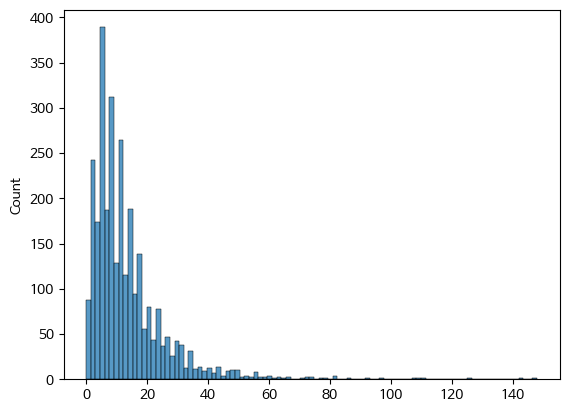

In [38]:
sns.histplot([len(x) for x in train_seq]) # tokenize 된 결과의 길이 분포도

In [39]:
max([len(x) for x in train_seq]), min([len(x) for x in train_seq])

(148, 0)

In [47]:
temp = np.array([len(x) for x in train_seq])
y_train.iloc[np.where(temp == 0)]

3345    0
1255    1
2251    0
2614    1
799     0
3103    0
2226    1
359     0
2561    0
2167    1
1048    0
2750    0
790     0
1500    0
1031    0
1591    0
501     0
3340    0
2445    0
3480    0
3540    1
2605    0
3525    0
2193    0
148     1
3433    0
3254    0
Name: label, dtype: int64

# 다시 처음부터 보자

### 외국어만 살펴보기. label = Code

In [240]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}

df = data.replace(label_dict)
df.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


In [241]:
label_code = df.loc[df['label'] == 0, 'text']
label_web = df.loc[df['label'] == 1, 'text']

In [242]:
%%time
temp = ' '.join(label_code)
m = MeCab()
code_result = m.pos(temp)

CPU times: user 47.6 s, sys: 182 ms, total: 47.8 s
Wall time: 48.1 s


In [243]:
code_result = np.array(code_result)

code_result[code_result[:, 1] == 'SL'][:, 0]

array(['self', 'convs', 'nn', ..., 'set', 'countvetorizer', 'tfidf'],
      dtype='<U25')

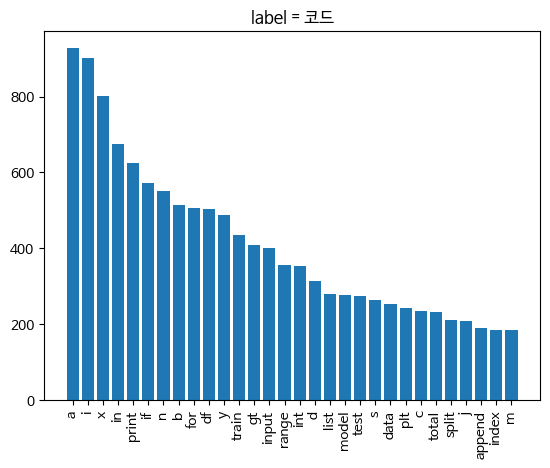

In [244]:
from collections import Counter

temp = [x.lower() for x in code_result[code_result[:, 1] == 'SL'][:, 0].tolist()]
cnt = Counter(temp)

temp = cnt.most_common(30)
x, y = [], []
for i, j in temp:
    x.append(i)
    y.append(j)
plt.title('label = 코드')
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [245]:
temp = [x.lower() for x in code_result[code_result[:, 1] == 'SL'][:, 0].tolist()]
cnt = Counter(temp)

### 영어만 살펴보기. label = 웹

In [246]:
%%time
temp = ' '.join(label_web)
m = MeCab()
web_result = m.pos(temp)

CPU times: user 5.64 s, sys: 13.7 ms, total: 5.65 s
Wall time: 5.74 s


In [247]:
web_result = np.array(web_result)

web_result[web_result[:, 1] == 'SL'][:, 0]

array(['PDF', 'Tier', 'WEB', ..., 'Attacker', 'Winwos', 'nat'],
      dtype='<U25')

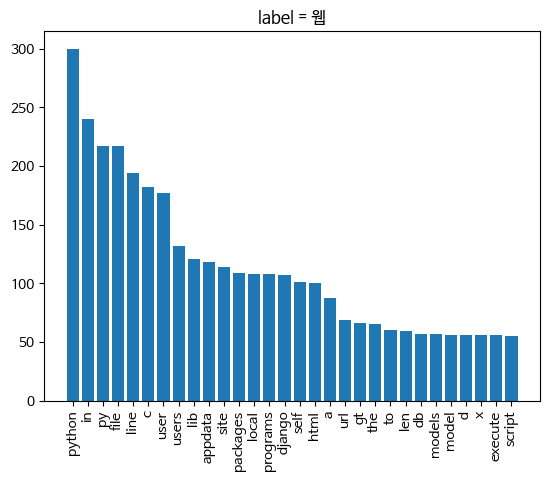

In [248]:
temp = [x.lower() for x in web_result[web_result[:, 1] == 'SL'][:, 0].tolist()]
cnt = Counter(temp)

temp = cnt.most_common(30)
x, y = [], []
for i, j in temp:
    x.append(i)
    y.append(j)
plt.title('label = 웹')
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

### 단어 품사가 NNG(일반 명사)와 NNP(고유 명사)인 것만 가져오기 + 외국어(SL)

In [249]:
%%time
nouns = ['NNG', 'NNP', 'SL']
mecab = MeCab()
result = []
for i in df['text']:
    temp = np.array(mecab.pos(i))
    temp2 = [i for i, j in temp if j in nouns]
    result.append(' '.join(temp2))

CPU times: user 4.07 s, sys: 37.2 ms, total: 4.11 s
Wall time: 4.06 s


In [250]:
df['nouns'] = result

In [251]:
df.head()

,text,label,nouns
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0,self convs nn ModuleList nn Conv d Co K for K ...
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1,이미지 업로드 자바 스크립트 동적 폼 생성 클릭 기본 예제 코드 이유
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0,glob glob PATH 사용 때 질문 PATH 포함 작동 질문 제공 파일 AIV...
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0,tmpp tmp groupby by Addr as index False Catego...
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0,filename TEST IMAGE str round frame sec jpg te...


### 불용어 제거

In [254]:
stop_words = list(stop_words)
stop_words.append('은')

In [255]:
result = []
for i in df['nouns']:
    temp = i.split()
    result.append(' '.join([j for j in temp if j not in stop_words]))

In [256]:
df['nouns'] = result

In [257]:
df.head()

,text,label,nouns
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0,self convs nn ModuleList nn Conv d Co K for K ...
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1,이미지 업로드 자바 스크립트 동적 폼 생성 클릭 기본 예제 코드 이유
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0,glob glob PATH 사용 질문 PATH 포함 작동 질문 제공 파일 AIVLE...
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0,tmpp tmp groupby by Addr as index False Catego...
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0,filename TEST IMAGE str round frame sec jpg te...


### Train, Test Split

In [258]:
x_train, x_test, y_train, y_test = train_test_split(
    df['nouns'].values, df['label'].values, test_size=0.2, 
    random_state=2023, stratify=df['label'].values)

### Tokenize

In [265]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer(lower=True)
tk.fit_on_texts(x_train)
train_seq = tk.texts_to_sequences(x_train)
test_seq = tk.texts_to_sequences(x_test)

In [266]:
len(tk.word_index) # token 개수

5997

In [268]:
count = 0
for k, v in tk.word_counts.items():
    if v < 2:
        count += 1
count

2055

In [269]:
# 빈도수가 1개인 token
for k, v in tk.word_counts.items():
    if v < 2:
        print(k, end=' ')

신택스 이용한 leakage benign malicious egg pretrainded 소괄호 당산 갑문 sklean xgboosting 장단점 낮 대만 조건식 intent analysis 명령문 xhr reponse 검수 출발선 완전 ng gnuboard aksemfrh 래퍼 kl 행복 이스 리스 실버 타사 후기 gpa ppcnosuchelementexception ontainernamedobjectpath 교수 job 잡서 칭 마인 편성 바디 헤드 영구 측정값 히트 표현식 complie addfile alt 부정행위 spacedesk 조장 코코 무언가 짜도 철자 igw 아리 빈 ydata whisker 지장 queryset dj 느 리서치 그릴 pillow rg gr bg br rr gg 와중 불순 소유 엔지니어 지 플러스 대형 창출 로켓 와우 unfortunately likely due misconfiguration way cgroups disabled teain hiddenlayer outputlayer funtion 자치 viewer 엄두 keywords mspe 색시 either 육상 수산 내수면 육성 websever humid 눈대중 trainc valc 띄어쓰기 목요일 gitlab 경남 gallery deleteview reversed exceptions included appear issue probably circular wieght 알렉스 체크포인트 백지 initjs explainer yticks zeros 대각선 실현 수여 상한 달성 melted 요새 찬스 창공 날기 시전 지우 배민 무리 이원화 userwarning 분자 serial 동려 스태킹 베이스 은단 영양제 xgbr 아이피 광장 노력 lightbgm building 뒤죽 박죽 외출 localizaion vader 상상 lucky ready mis mobile 새벽 사이버 취약점 의뢰인 위협 북사 kyj gmail mc freq queue workers multiprocessing 

In [270]:
max_words = len(tk.word_index) - count + 1
print("max_words :", max_words)
tk = Tokenizer(num_words=max_words, lower=False)
tk.fit_on_texts(x_train)
train_seq = tk.texts_to_sequences(x_train)
test_seq = tk.texts_to_sequences(x_test)

max_words : 3943


count    2964.00000
mean       25.42004
std        43.54991
min         0.00000
25%         8.00000
50%        14.00000
75%        28.00000
max       834.00000
dtype: float64

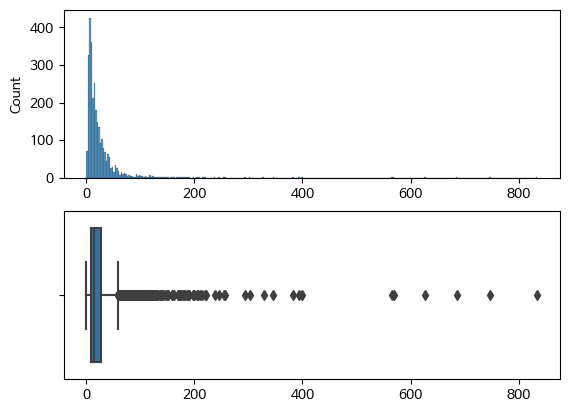

In [282]:
plt.subplot(2, 1, 1)
sns.histplot([len(x) for x in train_seq]) # tokenize 된 결과의 길이 분포도
plt.subplot(2, 1, 2)
sns.boxplot(x=[len(x) for x in train_seq])

pd.Series([len(x) for x in train_seq]).describe()

In [272]:
max([len(x) for x in train_seq]), min([len(x) for x in train_seq])

(834, 0)

In [273]:
temp = np.array([len(x) for x in train_seq])
y_train[np.where(temp == 0)]

array([1])

In [274]:
len(np.where(temp == 0)[0])

1

In [277]:
x_train[np.where(temp == 0)]

array(['HA'], dtype=object)

In [279]:
temp = np.array([len(x) for x in test_seq])
y_train[np.where(temp == 0)]

array([1, 2])

### 길이 맞추기

In [295]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 128
train_seq = pad_sequences(train_seq, maxlen=MAX_LEN, padding='pre', truncating='post')
test_seq = pad_sequences(test_seq, maxlen=MAX_LEN, padding='pre', truncating='post')

#### 데이터 저장

In [296]:
save_path = '/content/drive/MyDrive/에이블스쿨/실습파일/2023.04.03_미니프로젝트4차_실습자료/NNG_NNP_SL/'
np.save(save_path + 'x_train', train_seq)
np.save(save_path + 'x_test', test_seq)
np.save(save_path + 'y_train', y_train)
np.save(save_path + 'y_test', y_test)